# <center> Projet Santé publique France  </center>

# <center> Partie Analyse </center>

<img src="https://fr.blog.openfoodfacts.org/images/ag_2016_openfoodfacts_3.png" width=922>


### <center>Dataset : OpenFoodfacts </center>
### <center>  https://fr.openfoodfacts.org/data <center>

# <center> Analyse exploratoire </center>

10 min - Présentation de l’analyse exploratoire.

Dans cette partie nous analyserons les données. 

In [1]:
#Ci dessous la liste des packages que nous utilsons pour ce projet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import rpy2
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
#Bridge R
import rpy2

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
#Afficher toute les colonnes
pd.set_option('display.max_columns', None)

print("Les packages sont chargés.")



from mlxtend.data import iris_data
from mlxtend.plotting import plot_pca_correlation_graph

%load_ext rpy2.ipython

Les packages sont chargés.


In [2]:
df=pd.read_csv("Openfoodfacts_propre.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#TROP DE PAYS, juste France
df['countries'] = df['countries_en'].str.upper()
len(df.countries.unique())

1

In [4]:
df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,ratio
0,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,2015-10-11 14:09:21,2015-10-11 14:09:21+00:00,2015-10-12 14:13:32,2015-10-12T14:13:32Z,moutarde au moût de raisin,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",FRANCE,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,0.0,0.0,0.0,18.0,d,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:mustards,Mustards,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.600,1.8400,18.0,40
1,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-04-11 10:00:13,2018-04-11 10:00:13+00:00,2019-08-08 12:46:52,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...","Meals,Prepared vegetables,Grated carrots,Seaso...",FRANCE,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,1.0,b,NaN,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:seasoned-shredded-carrots,Seasoned shredded carrots,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,32.0,134.0,0.3,0.1,5.3,3.9,0.9,0.420,0.1680,1.0,37
2,0000000001199,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-02-05 12:26:34,2018-02-05 12:26:34+00:00,2018-10-27 21:08:31,2018-10-27T21:08:31Z,Solène céréales poulet,CROUS,crous,NaN,NaN,NaN,FRANCE,en:france,France,"antioxydant : érythorbate de sodium, colorant ...",NaN,NaN,5.0,0.0,0.0,NaN,NaN,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,219.0,916.0,5.9,0.5,30.3,1.7,9.7,0.464,0.1856,NaN,38
3,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-02-05 11:40:01,2018-02-05 11:40:01+00:00,2018-05-23 10:19:54,2018-05-23T10:19:54Z,Tarte noix de coco,"Crous Resto',Crous","crous-resto,crous","Tartes, Tartes sucrées, Tartes à la noix de coco","en:pies,en:sweet-pies,en:coconut-pies","Pies,Sweet pies,Coconut pies",FRANCE,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,14.0,d,NaN,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:coconut-pies,Coconut pies,https://images.openfoodfacts.org/images/produc...,https:/

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206612 entries, 0 to 206611
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     206612 non-null  object 
 1   url                                      206612 non-null  object 
 2   creator                                  206611 non-null  object 
 3   created_t                                206612 non-null  object 
 4   created_datetime                         206612 non-null  object 
 5   last_modified_t                          206612 non-null  object 
 6   last_modified_datetime                   206612 non-null  object 
 7   product_name                             206261 non-null  object 
 8   brands                                   163728 non-null  object 
 9   brands_tags                              163717 non-null  object 
 10  categories                      

In [6]:
len(df.pnns_groups_1.unique())
df.pnns_groups_1.unique()

array(['Fat and sauces', 'Composite foods', 'unknown', 'Sugary snacks',
       'Milk and dairy products', 'Fish Meat Eggs',
       'Cereals and potatoes', 'Beverages', 'Salty snacks',
       'Fruits and vegetables', 'Alcoholic beverages'], dtype=object)

In [7]:
len(df.pnns_groups_2.unique())
df.pnns_groups_2.unique()

array(['Dressings and sauces', 'One-dish meals', 'unknown',
       'Biscuits and cakes', 'Cheese', 'Meat', 'Bread',
       'Fish and seafood', 'Fruit juices', 'Salty and fatty products',
       'Sweets', 'Dairy desserts', 'Pizza pies and quiches', 'Fruits',
       'Unsweetened beverages', 'Cereals', 'Nuts', 'Appetizers',
       'Pastries', 'Dried fruits', 'Vegetables', 'Processed meat',
       'Breakfast cereals', 'Sandwiches', 'Legumes', 'Milk and yogurt',
       'Teas and herbal teas and coffees', 'Soups', 'Potatoes',
       'Artificially sweetened beverages', 'Fats', 'Chocolate products',
       'Sweetened beverages', 'Plant-based milk substitutes', 'Ice cream',
       'Waters and flavored waters', 'Eggs', 'Offals', 'Fruit nectars',
       'Alcoholic beverages'], dtype=object)

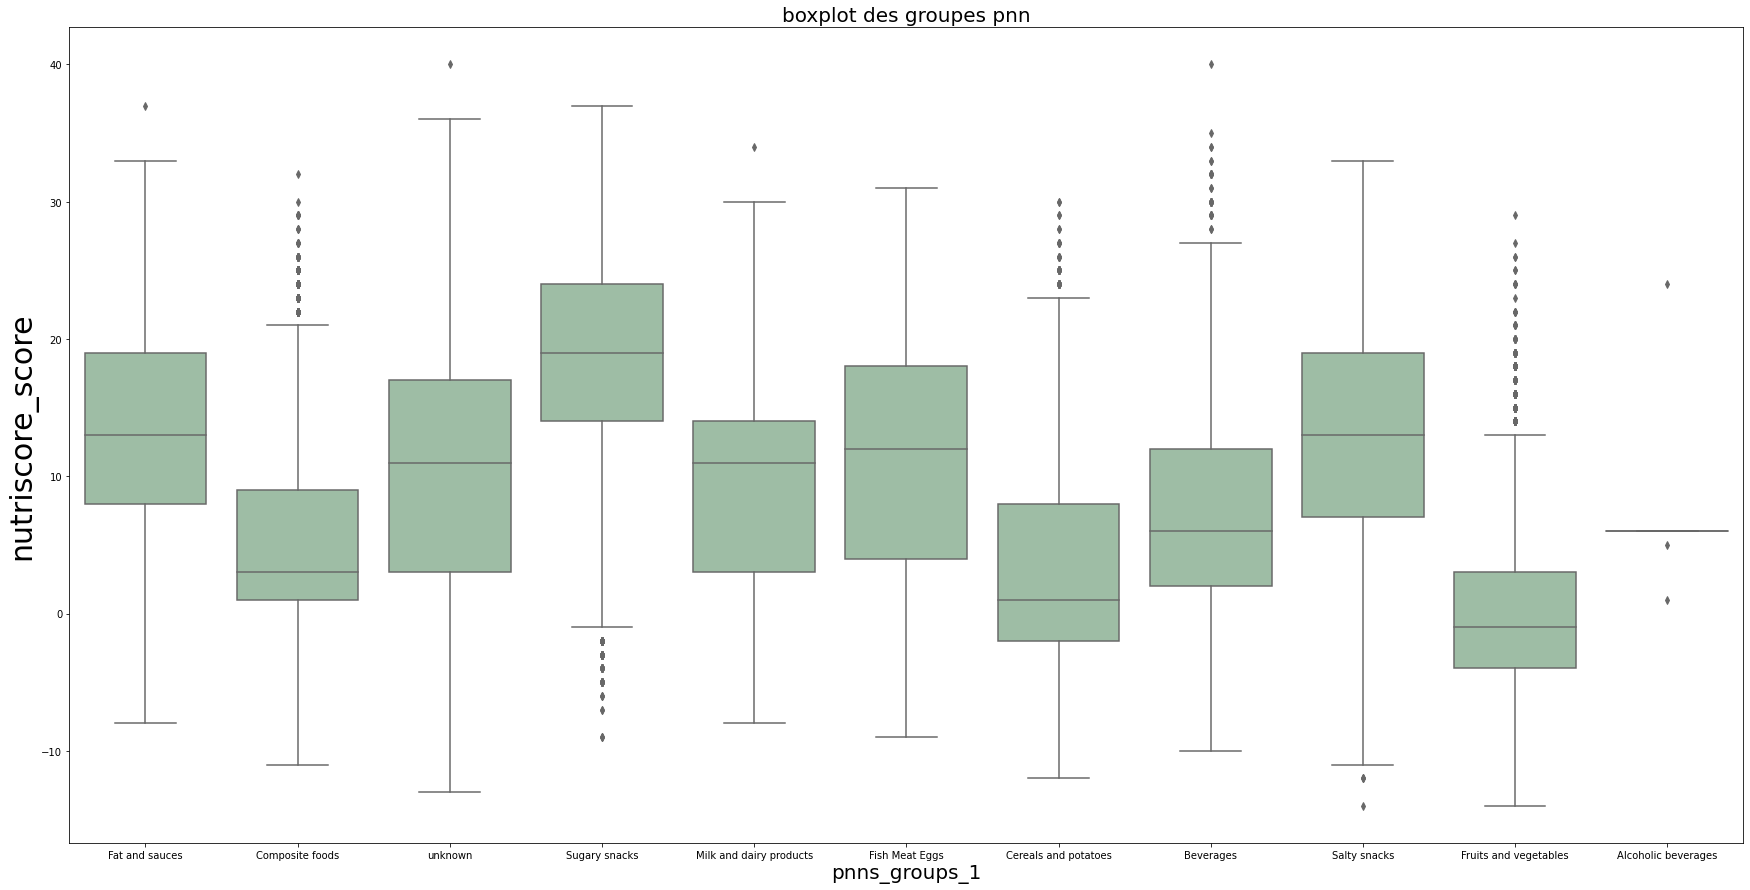

In [8]:
plt.figure(figsize=(30,15))
plt.title("boxplot des groupes pnn",size=20)
plt.xlabel('', size = 20)
plt.ylabel('', size = 30)
ax = sns.boxplot(x='pnns_groups_1', y='nutriscore_score', data=df, color='#99c2a2')
plt.show()

Nous constatons sur le boxplot que les groupes pnns peuvent être discriminant pour la construction du nutriscore. Confirmons notre visualisation avec une anova.

In [9]:
df_anova=df[["nutriscore_score",'pnns_groups_1']]
df_anova=df_anova.dropna()

In [10]:
%%R -i df_anova -w 5 -h 5 --units in -r 100
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution
anova_variete <- lm(nutriscore_score~pnns_groups_1,data=df_anova)
summary(anova_variete)


Call:
lm(formula = nutriscore_score ~ pnns_groups_1, data = df_anova)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.358  -5.358  -0.235   5.642  32.755 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            6.7059     1.7114   3.918 8.92e-05 ***
pnns_groups_1Beverages                 0.5387     1.7146   0.314 0.753367    
pnns_groups_1Cereals and potatoes     -3.4713     1.7123  -2.027 0.042634 *  
pnns_groups_1Composite foods          -1.8735     1.7120  -1.094 0.273813    
pnns_groups_1Fat and sauces            6.3052     1.7129   3.681 0.000232 ***
pnns_groups_1Fish Meat Eggs            4.5651     1.7118   2.667 0.007659 ** 
pnns_groups_1Fruits and vegetables    -6.8558     1.7128  -4.003 6.26e-05 ***
pnns_groups_1Milk and dairy products   2.3171     1.7120   1.353 0.175907    
pnns_groups_1Salty snacks              5.7957     1.7124   3.385 0.000713 ***
pnns_groups_1Sugary snacks            11

Effectivement le fait que l'aliment soit un fruit/légume ou un snack a une influence sur le nutriscore. Les p-values sont inférieus à 0.05.

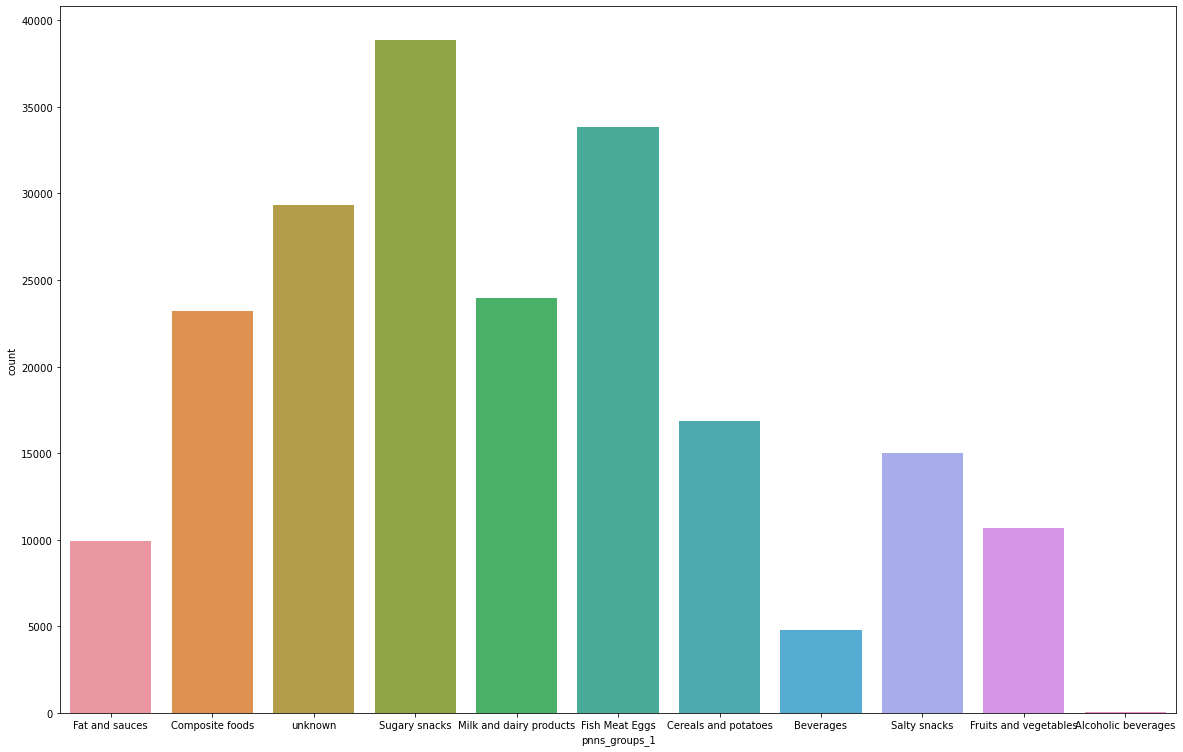

In [11]:
plt.figure(figsize=(20,13))
sns.countplot(x='pnns_groups_1', data=df)
plt.show()

### Le nutriscore

nutriscore en fonction des variables quantitatives
nutriscore en fonction des variables qualitativess
+ résumé des variables petinentes

In [12]:
###  Analyse multivarié

In [13]:
#af=df["nutriscore_score",]
#af.head()

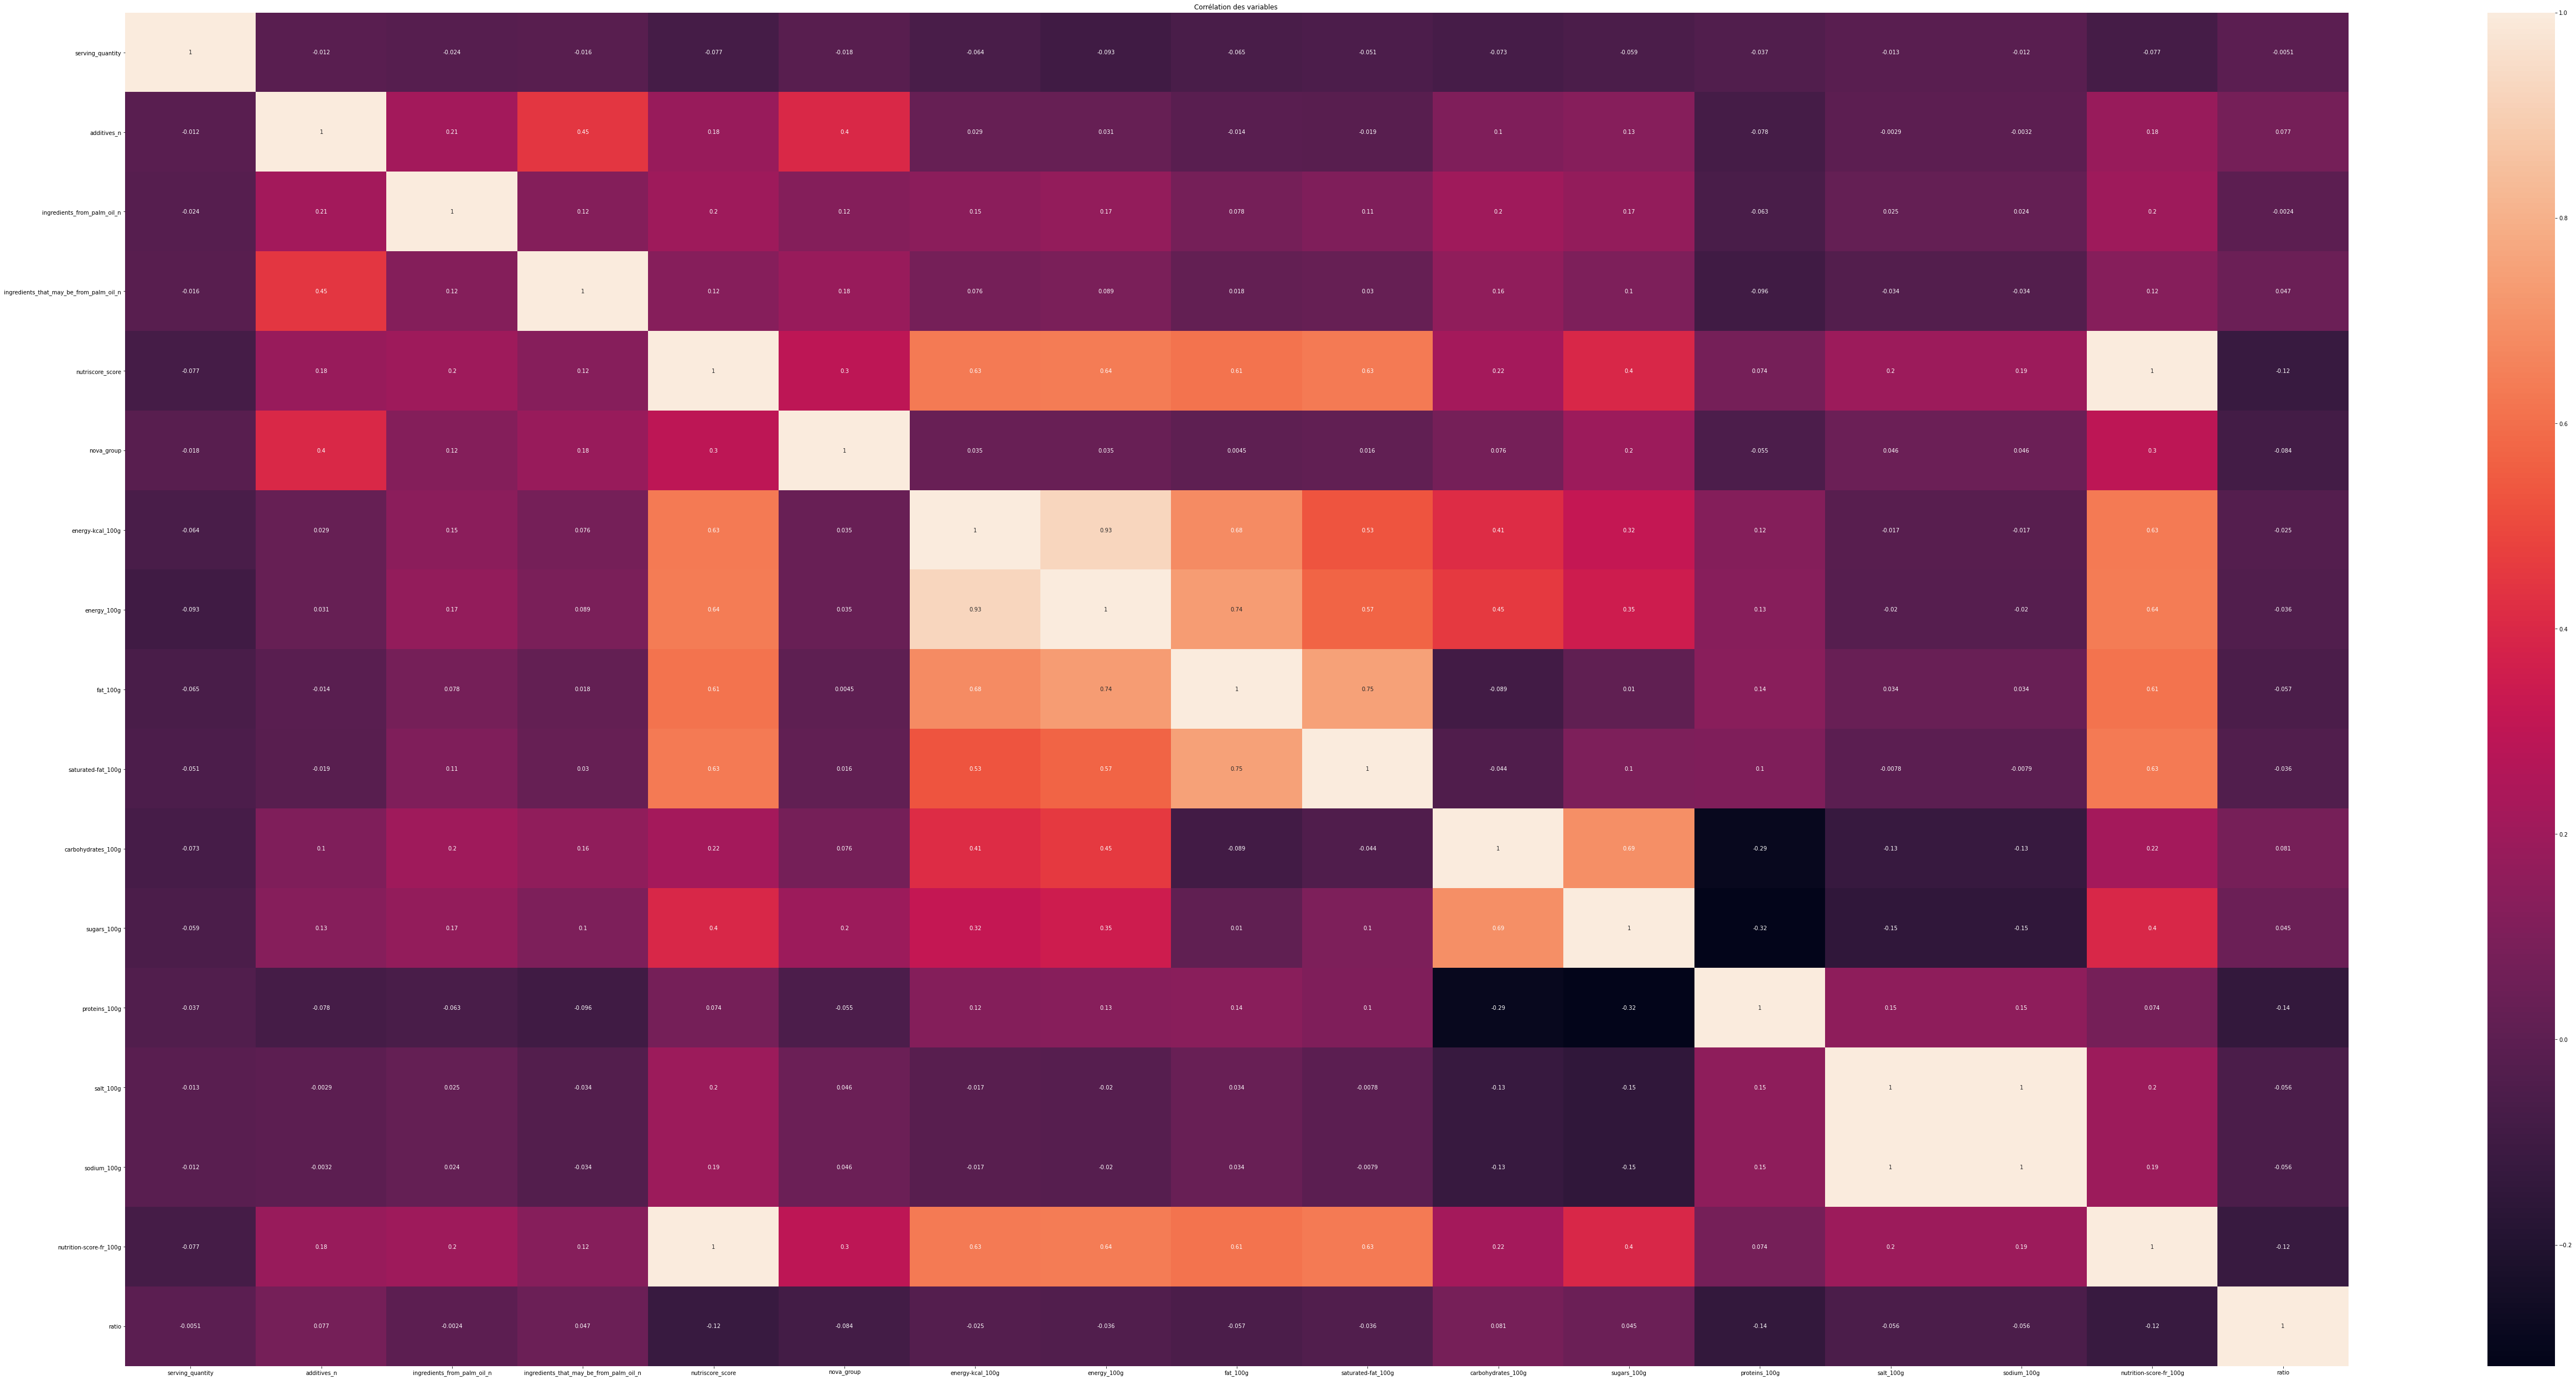

In [14]:
plt.figure(figsize=(30*3,15*3))
plt.title("Corrélation des variables ")
sns.heatmap(df.corr(),annot=True)
plt.show()

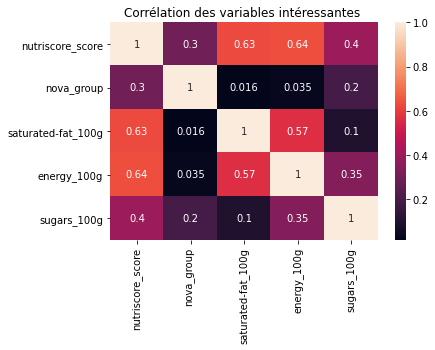

In [15]:
# On selectionne les variables avec une correlation >0.3 avec le nutriscore, on ne prend qu'un pour l'energie et les graisse.
temp=df[["nutriscore_score","nova_group","saturated-fat_100g","energy_100g","sugars_100g"]]
plt.title("Corrélation des variables intéressantes ")
sns.heatmap(temp.corr(),annot=True)
plt.show()


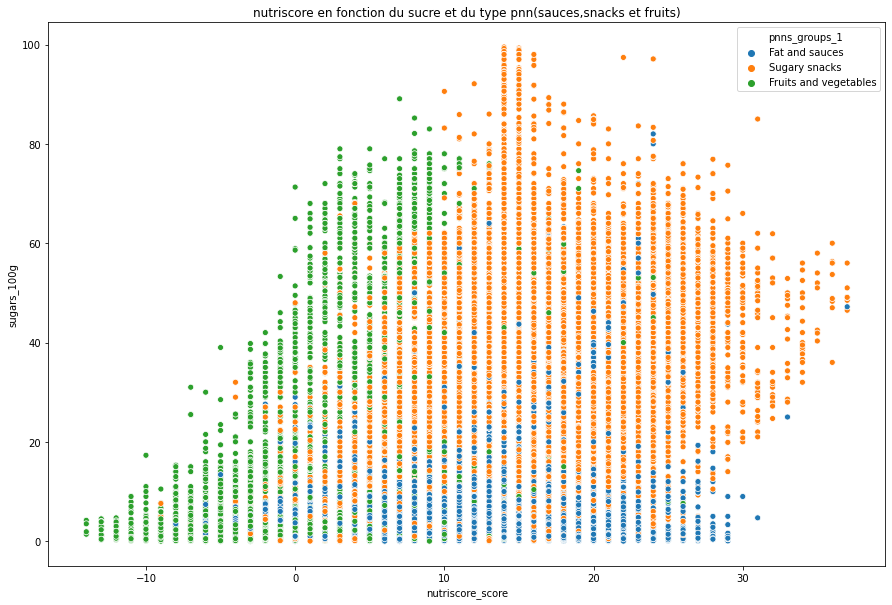

In [16]:
af=df[(df['pnns_groups_1']=="Fat and sauces" ) | (df['pnns_groups_1']=="Fruits and vegetables" )| (df['pnns_groups_1']=="Sugary snacks" )]
plt.figure(figsize=(15,10))
plt.title("nutriscore en fonction du sucre et du type pnn(sauces,snacks et fruits)")
sns.scatterplot(data=af, x="nutriscore_score", y="sugars_100g", hue='pnns_groups_1')
plt.show()

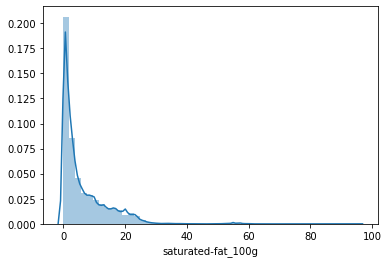

In [17]:
x = pd.Series(df["saturated-fat_100g"], name="saturated-fat_100g")
ax = sns.distplot(x)
plt.show()

In [18]:
df['pnns_groups_1'] =="Fat and sauces" 

0          True
1         False
2         False
3         False
4         False
          ...  
206607    False
206608    False
206609    False
206610    False
206611    False
Name: pnns_groups_1, Length: 206612, dtype: bool

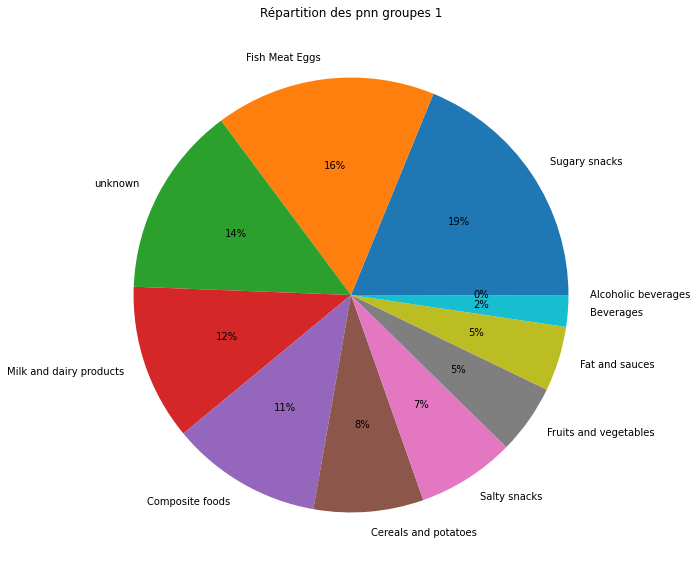

In [19]:
plt.figure(figsize=(10,10))
plt.title("Répartition des pnn groupes 1")
a=list(df.pnns_groups_1.value_counts().values)
b=list(df.pnns_groups_1.value_counts().index)
plt.pie(a,labels=b, autopct='%.0f%%')
plt.show()

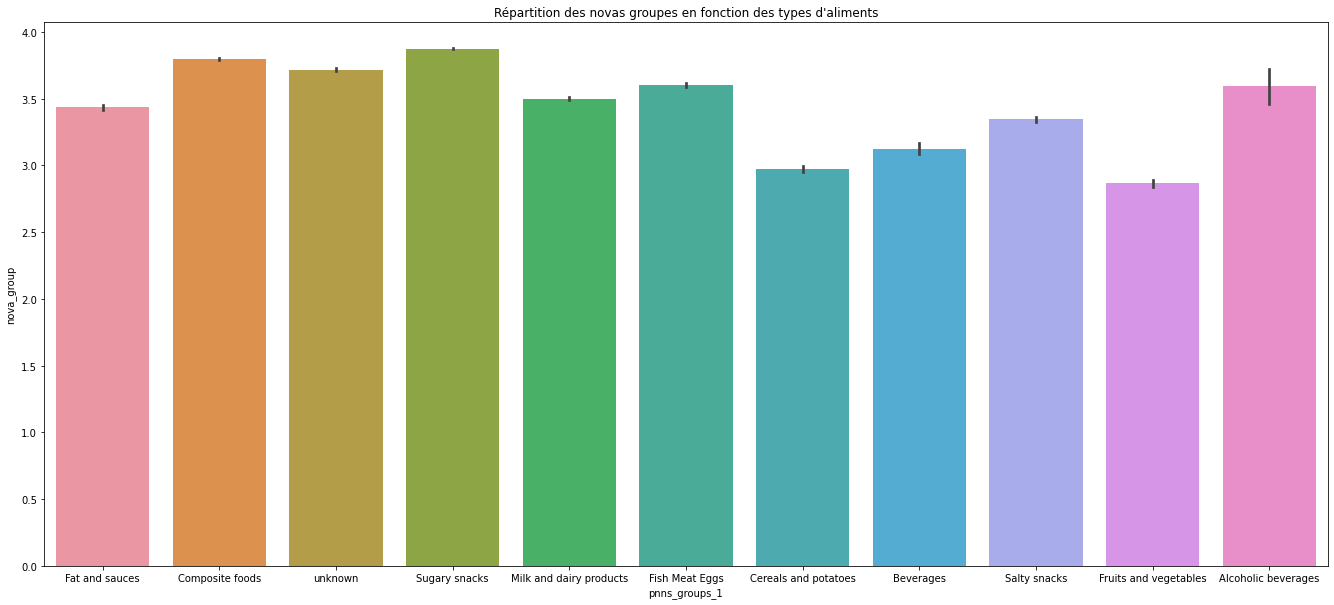

In [20]:
plt.figure(figsize=(23,10))
plt.title("Répartition des novas groupes en fonction des types d'aliments")
sns.barplot(x='pnns_groups_1', y="nova_group", data=df)
plt.show()

In [21]:
df_pca=df[["saturated-fat_100g","energy_100g","sugars_100g","nutriscore_score"]]
df_pca=df_pca.dropna()
df_pca= df_pca / df_pca.std(axis=0)

In [22]:
 df_pca / df_pca.std(axis=0)

,saturated-fat_100g,energy_100g,sugars_100g,nutriscore_score
0,0.275131,1.282118,1.312582,2.032356
1,0.012506,0.183551,0.232685,0.112909
3,1.938425,2.183436,1.306615,1.580721
4,0.125060,0.819131,0.059663,0.112909
8,2.701290,2.275211,0.005966,1.580721
...,...,...,...,...
206607,0.437709,1.324581,0.328145,1.241995
206608,3.526684,3.346383,1.604929,2.483990
206609,0.537757,0.860224,0.835279,0.790360
206610,2.126015,1.983447,1.073930,1.919447


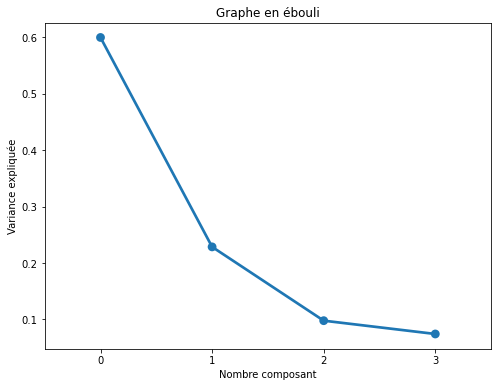

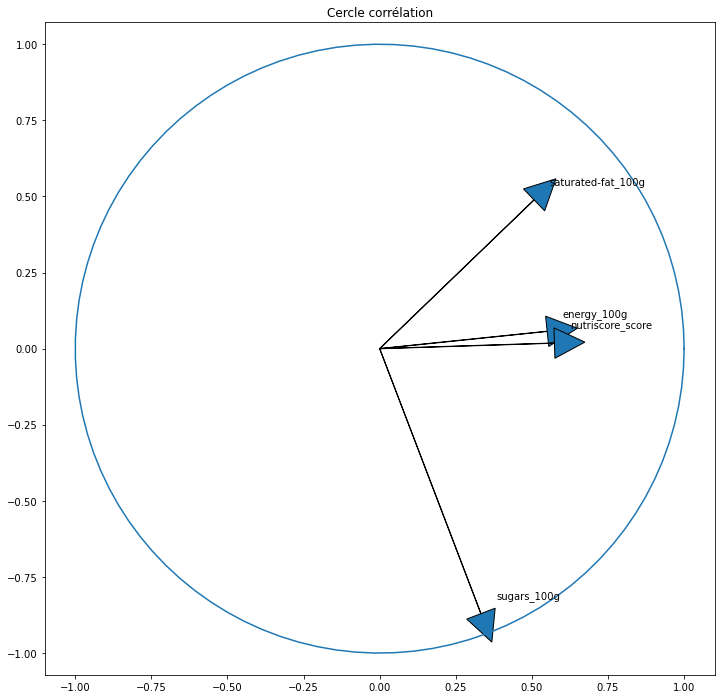

In [23]:
n_components = 4
pca = PCA(n_components=4)
reduced = pca.fit_transform(df_pca[["saturated-fat_100g","energy_100g","sugars_100g","nutriscore_score"]])
 

for i in range(0, n_components):
    df_pca['PC' + str(i + 1)] = reduced[:, i]
 
 
# graphe ébouli
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Graphe en ébouli')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Nombre composant')
ax.set_ylabel('Variance expliquée')
plt.show()

 
# Cercle corrélation
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_)):
    ax.arrow(0, 0,  
             pca.components_[0, i], pca.components_[1, i],  
             head_width=0.1,head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, df_pca.columns.values[i])
 
an = np.linspace(0, 2 * np.pi, 100)  
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Cercle corrélation')
plt.show()

En faisant cette ACP sur les variables quantitatives que nous estimons pertinentes. Nous nous rendons compte ,grâce au cercle des corrélations, que l'ensemble de nos variables quantitaves ont un effet négatif sur le nutriscore. En effet, plus elles sont élevés plus le nutriscore est élevé. Avec 2 composants nous expliquons plus de 80% de la variance. On remarque aussi que le taux de sucre et de gras saturé peuvent être des variables discriminantes pour le nutriscore.

In [24]:
pca.components_

array([[ 0.5071395 ,  0.55015495,  0.33264052,  0.57401162],
       [ 0.48860745,  0.05683908, -0.87045866,  0.01827031],
       [-0.40429688,  0.83159795, -0.17968544, -0.33571123],
       [ 0.58362344,  0.05043517,  0.31522239, -0.74664236]])

# <center> Application </center>

5 min - Présentation des faits pertinents pour l’application.

### Régression linéaire multiple 

Dans cette partie nous prédirons le nutri-score à partir de quelques features. Les features que nous choissisons découlent de l'ananlyse exploratoire effectuée juste avant. Donc nous utiliserons le groupe nova, le taux de graisse saturé et le type de produit.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # score recall
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,ratio
0,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,2015-10-11 14:09:21,2015-10-11 14:09:21+00:00,2015-10-12 14:13:32,2015-10-12T14:13:32Z,moutarde au moût de raisin,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",FRANCE,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,0.0,0.0,0.0,18.0,d,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:mustards,Mustards,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.600,1.8400,18.0,40
1,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-04-11 10:00:13,2018-04-11 10:00:13+00:00,2019-08-08 12:46:52,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...","Meals,Prepared vegetables,Grated carrots,Seaso...",FRANCE,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,1.0,b,NaN,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:seasoned-shredded-carrots,Seasoned shredded carrots,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,32.0,134.0,0.3,0.1,5.3,3.9,0.9,0.420,0.1680,1.0,37
2,0000000001199,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-02-05 12:26:34,2018-02-05 12:26:34+00:00,2018-10-27 21:08:31,2018-10-27T21:08:31Z,Solène céréales poulet,CROUS,crous,NaN,NaN,NaN,FRANCE,en:france,France,"antioxydant : érythorbate de sodium, colorant ...",NaN,NaN,5.0,0.0,0.0,NaN,NaN,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,219.0,916.0,5.9,0.5,30.3,1.7,9.7,0.464,0.1856,NaN,38
3,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-02-05 11:40:01,2018-02-05 11:40:01+00:00,2018-05-23 10:19:54,2018-05-23T10:19:54Z,Tarte noix de coco,"Crous Resto',Crous","crous-resto,crous","Tartes, Tartes sucrées, Tartes à la noix de coco","en:pies,en:sweet-pies,en:coconut-pies","Pies,Sweet pies,Coconut pies",FRANCE,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,14.0,d,NaN,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:coconut-pies,Coconut pies,https://images.openfoodfacts.org/images/produc...,https:/

In [27]:
print(df.shape)
df_model=df[["nutriscore_score","nova_group","saturated-fat_100g","energy_100g","sugars_100g",'pnns_groups_1']]
df_model=df_model.dropna()
df_model=pd.get_dummies(df_model)
print(df_model.shape)

(206612, 49)
(102623, 16)


In [28]:
df_model.head()

,nutriscore_score,nova_group,saturated-fat_100g,energy_100g,sugars_100g,pnns_groups_1_Alcoholic beverages,pnns_groups_1_Beverages,pnns_groups_1_Cereals and potatoes,pnns_groups_1_Composite foods,pnns_groups_1_Fat and sauces,pnns_groups_1_Fish Meat Eggs,pnns_groups_1_Fruits and vegetables,pnns_groups_1_Milk and dairy products,pnns_groups_1_Salty snacks,pnns_groups_1_Sugary snacks,pnns_groups_1_unknown
12,-4.0,4.0,0.50,669.0,0.60,0,0,1,0,0,0,0,0,0,0,0
20,0.0,4.0,0.90,450.0,0.50,0,0,0,1,0,0,0,0,0,0,0
23,2.0,4.0,11.20,1952.4,69.80,0,0,0,0,0,0,0,1,0,0,0
28,1.0,4.0,0.10,1577.0,66.00,0,0,0,0,0,0,1,0,0,0,0
31,15.0,4.0,0.77,1732.0,69.97,0,0,0,0,0,0,0,0,0,0,1


In [29]:
data=df_model.loc[:, df_model.columns != "nutriscore_score"]
target=df_model[["nutriscore_score"]]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [31]:
print(X_train.shape)  
print(X_test.shape)   

(82098, 15)
(20525, 15)


In [32]:
print(y_train.shape)
print(y_test.shape) 

(82098, 1)
(20525, 1)


In [33]:
LM = LinearRegression()
LM=LM.fit(X_train,y_train)
predictions=LM.predict(X_test)

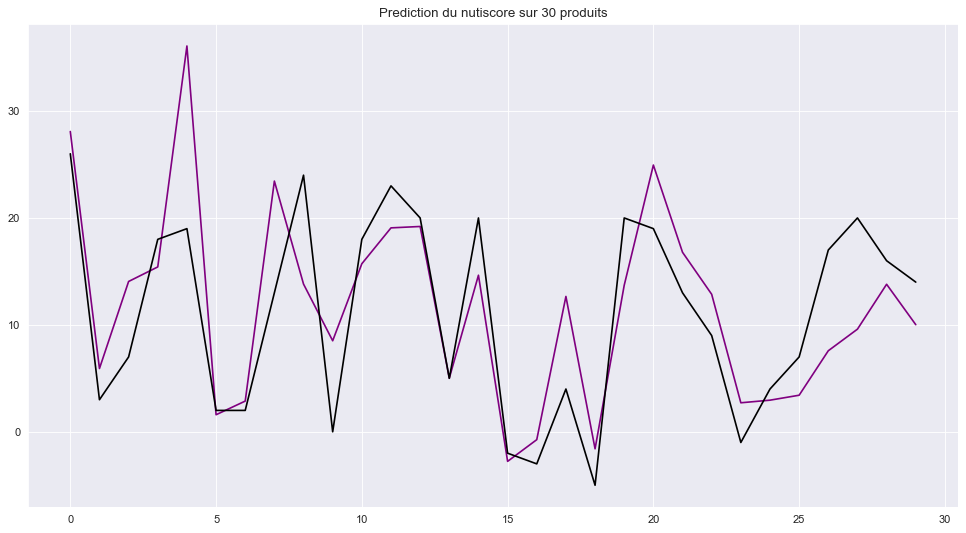

En violet les predictions, en noir la réalité.


In [34]:
#regression linéaire multiple sans les covariables artificielles
x_plot = np.arange(0,len(y_test))
sns.set_style("darkgrid")
plt.figure(num=None, figsize=(15,8), dpi=80)
y = np.arange(0,len(y_test))
plt.plot(y[:30],predictions[:30],color="purple")
plt.plot(x_plot[:30],y_test[:30],color="black")
plt.title("Prediction du nutiscore sur 30 produits")
plt.show()
print("En violet les predictions, en noir la réalité.")

In [35]:
rms = mean_squared_error(y_test, predictions, squared=False)
rms

4.650074457387623

In [36]:
mae=mean_absolute_error(y_test, predictions)
mae

3.6781610076353264

In [37]:
r2 =r2_score(y_test, predictions)
r2

0.7351304304373654

In [38]:
def nutriscore(x):
    if(x<=-2 ):
        x="A"
    elif(x<=1 and x>-2):
        x="B"
    elif(x<=11 and x>1):
        x="C"
    elif(x<=16 and x>11):
        x="D"
    else:
        x="E"
    return(x)

print(nutriscore(3))

C


In [39]:
a=[nutriscore(i) for i in y_test.values]

In [40]:
b=[nutriscore(i) for i in predictions]


In [41]:
#pourcentage de nutriscore bien prédit
(len([i for i, j in zip(a, b) if i == j])/len(b))*100


57.23751522533496

In [42]:
def nutriscore2(x):
    if(x<=10 ):
        x="bon ou moyen"
    else:
        x="mauvais"
    return(x)

print(nutriscore2(3))

bon ou moyen


In [43]:
a=[nutriscore2(i) for i in y_test.values]
b=[nutriscore2(i) for i in predictions]
#pourcentage de nutriscore2 bien prédit
(len([i for i, j in zip(a, b) if i == j])/len(b))*100

84.86723507917175

# Conclusion

Il s'avère possible de prédire le nutriscore avec quelques variables.Cependant nous avons prédit le nutriscore sous sa forme numérique avec un modèle de régression. Pour avoir de meilleur résultats nous aurions pu directement utilisé la forme catégiorelle avec un modèle de classification.

## <center> Fin Exploratoire </center>